In [1]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#  Copyright 2021-  QuOCS Team
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [2]:
import matplotlib.pyplot as plt
import os

# Parameter Optimization

### Define the Model
We use the Rosenbrock provided by numpy. It is wrapped in a class named RosenFoM which is a child of the AbstractFoM class provided by QuOCS. The class should contain a function called get_FoM() which takes the pulses, parameters and timegrids as lists on numpy arrays.

In [3]:
import numpy as np
from scipy.optimize import rosen

from quocslib.utils.AbstractFoM import AbstractFoM


class RosenFoM(AbstractFoM):

    def __init__(self, args_dict: dict = None):
        if args_dict is None:
            args_dict = {}

    def get_FoM(self, pulses: list = [], parameters: list = [], timegrids: list = []) -> dict:
        """
        Function to calculate the figure of merit from the pulses and parameters and timegrids.
        Here, only the parameters are used and passed to the rosen function.
        :param list pulses: List of np.arrays. One np.array for each pulse.
        :param list timegrids: List of np.arrays. One np.array for each time grid.
        :param list parameters: List of floats. One float ofr each parameter.
        :return: dict - The figure of merit in a dictionary
        """
        FoM = rosen(np.asarray(parameters))
        return {"FoM": FoM}


### Define the configuration dictionary
This dictionary is passed to the QuOCS optimized in order to tell it what optimization algorithm to use. I also contains further settings for the optimization process.

First, we give the optimization a name, which will also appear in the name of the results folder generated.

In [4]:
optimization_dictionary = {"optimization_client_name": "IsingModeldCRAB"}

The "algotithm_settings" key in gets a dictionary with the name of the algorithm. In this case a direct search (for the parameters).

In [5]:
optimization_dictionary["algorithm_settings"] = {"algorithm_name": "DirectSearch"}

We then define the direct search alsgorithm to be Nelder-Mead and specify some stopping criteria.

In [6]:
dsm_settings = {
        "general_settings": {
            "dsm_algorithm_name": "NelderMead",
            "is_adaptive": False
        },
        "stopping_criteria": {
            "xatol": 1e-5,
            "fatol": 1e-12
        }
    }

And then add the dsm_settings dictionary to the "algorithm_settings" part of the optimization_dictionary.

In [7]:
optimization_dictionary["algorithm_settings"]["dsm_settings"] = dsm_settings

The controls are defined as parameters with limits, initial value and an initial variation.

In [8]:
total_number_of_parameters = 10
parameters = []
for index in range(total_number_of_parameters):
    parameters.append({"parameter_name": "Parameter{0}".format(index),
                       "lower_limit": -2.0,
                       "upper_limit": 2.0,
                       "initial_value": 0.4,
                       "amplitude_variation": 0.5})

Insert the controls in the optimization dictionary

In [9]:
optimization_dictionary["pulses"] = []
optimization_dictionary["parameters"] = parameters
optimization_dictionary["times"] = []

### Create the optimizer and run the optimization

In [10]:
from quocslib.Optimizer import Optimizer
import time

# Define Optimizer
optimization_obj = Optimizer(optimization_dictionary, RosenFoM())

INFO     oc_logger    The optimization direction is minimization


Run the optimization and track the time needed:

In [11]:
time1 = time.time()
optimization_obj.execute()
time2 = time.time()
print("The optimization took {seconds} seconds".format(seconds=time2 - time1))

INFO     oc_logger    QuOCS version number: 0.0.55
INFO     oc_logger    New record achieved. Previous FoM: 10000000000, new best FoM : 55.08
INFO     oc_logger    Function evaluation number: 1, FoM: 55.08
INFO     oc_logger    Function evaluation number: 2, FoM: 91.64534708791027
INFO     oc_logger    Function evaluation number: 3, FoM: 93.96828258545204
INFO     oc_logger    Function evaluation number: 4, FoM: 105.53779150490934
INFO     oc_logger    Function evaluation number: 5, FoM: 119.3510096328672
INFO     oc_logger    Function evaluation number: 6, FoM: 110.92944023469548
INFO     oc_logger    Function evaluation number: 7, FoM: 97.97494711816404
INFO     oc_logger    Function evaluation number: 8, FoM: 109.03963624286548
INFO     oc_logger    Function evaluation number: 9, FoM: 117.28831083820134
INFO     oc_logger    Function evaluation number: 10, FoM: 115.25748127716695
INFO     oc_logger    Function evaluation number: 11, FoM: 99.63169339771434
INFO     oc_logger    Funct

INFO     oc_logger    Function evaluation number: 92, FoM: 36.38226577542849
INFO     oc_logger    Function evaluation number: 93, FoM: 33.021888573350225
INFO     oc_logger    Function evaluation number: 94, FoM: 28.558149043179824
INFO     oc_logger    Function evaluation number: 95, FoM: 40.85475146500549
INFO     oc_logger    Function evaluation number: 96, FoM: 29.29968660442477
INFO     oc_logger    New record achieved. Previous FoM: 28.48404554516262, new best FoM : 26.710833682303225
INFO     oc_logger    Function evaluation number: 97, FoM: 26.710833682303225
INFO     oc_logger    Function evaluation number: 98, FoM: 31.818328979841823
INFO     oc_logger    Function evaluation number: 99, FoM: 32.88296038355592
INFO     oc_logger    Function evaluation number: 100, FoM: 28.389210311664144
INFO     oc_logger    New record achieved. Previous FoM: 26.710833682303225, new best FoM : 22.951634316555282
INFO     oc_logger    Function evaluation number: 101, FoM: 22.951634316555282
I

INFO     oc_logger    Function evaluation number: 172, FoM: 7.302914002124332
INFO     oc_logger    Function evaluation number: 173, FoM: 9.763792428852458
INFO     oc_logger    Function evaluation number: 174, FoM: 11.044077269074588
INFO     oc_logger    Function evaluation number: 175, FoM: 8.459775746175328
INFO     oc_logger    New record achieved. Previous FoM: 7.302914002124332, new best FoM : 6.3125894008805545
INFO     oc_logger    Function evaluation number: 176, FoM: 6.3125894008805545
INFO     oc_logger    Function evaluation number: 177, FoM: 7.302357870396159
INFO     oc_logger    Function evaluation number: 178, FoM: 9.990760822253685
INFO     oc_logger    Function evaluation number: 179, FoM: 9.809558732082316
INFO     oc_logger    Function evaluation number: 180, FoM: 11.572069793264271
INFO     oc_logger    Function evaluation number: 181, FoM: 7.850970626774617
INFO     oc_logger    Function evaluation number: 182, FoM: 8.765412871342086
INFO     oc_logger    Functio

INFO     oc_logger    Function evaluation number: 258, FoM: 3.287176125137386
INFO     oc_logger    Function evaluation number: 259, FoM: 3.647198838008663
INFO     oc_logger    Function evaluation number: 260, FoM: 3.531883610181321
INFO     oc_logger    Function evaluation number: 261, FoM: 3.197979509346607
INFO     oc_logger    Function evaluation number: 262, FoM: 3.831530918134953
INFO     oc_logger    Function evaluation number: 263, FoM: 3.3682036803439495
INFO     oc_logger    Function evaluation number: 264, FoM: 3.4390475244825094
INFO     oc_logger    Function evaluation number: 265, FoM: 3.4811198526683063
INFO     oc_logger    Function evaluation number: 266, FoM: 3.4009888211866386
INFO     oc_logger    Function evaluation number: 267, FoM: 3.523920512997148
INFO     oc_logger    Function evaluation number: 268, FoM: 3.274447019929208
INFO     oc_logger    Function evaluation number: 269, FoM: 3.2776251055631387
INFO     oc_logger    Function evaluation number: 270, FoM:

INFO     oc_logger    Function evaluation number: 344, FoM: 2.9247329490074505
INFO     oc_logger    New record achieved. Previous FoM: 2.919400758599259, new best FoM : 2.9127254707892174
INFO     oc_logger    Function evaluation number: 345, FoM: 2.9127254707892174
INFO     oc_logger    Function evaluation number: 346, FoM: 2.9289619874402364
INFO     oc_logger    Function evaluation number: 347, FoM: 2.9375707213612863
INFO     oc_logger    Function evaluation number: 348, FoM: 2.916937675466953
INFO     oc_logger    Function evaluation number: 349, FoM: 2.9202945588659976
INFO     oc_logger    Function evaluation number: 350, FoM: 2.933932838950281
INFO     oc_logger    Function evaluation number: 351, FoM: 2.9156233528098694
INFO     oc_logger    Function evaluation number: 352, FoM: 2.934247010070783
INFO     oc_logger    Function evaluation number: 353, FoM: 2.915564869410651
INFO     oc_logger    Function evaluation number: 354, FoM: 2.9335453175931647
INFO     oc_logger    Fun

INFO     oc_logger    Function evaluation number: 429, FoM: 2.9044025510661404
INFO     oc_logger    Function evaluation number: 430, FoM: 2.9047747954065644
INFO     oc_logger    Function evaluation number: 431, FoM: 2.9051839488253406
INFO     oc_logger    Function evaluation number: 432, FoM: 2.90448584955338
INFO     oc_logger    Function evaluation number: 433, FoM: 2.9044831342884336
INFO     oc_logger    Function evaluation number: 434, FoM: 2.905706514630685
INFO     oc_logger    Function evaluation number: 435, FoM: 2.904403632061436
INFO     oc_logger    Function evaluation number: 436, FoM: 2.905814230500201
INFO     oc_logger    Function evaluation number: 437, FoM: 2.9046514529251866
INFO     oc_logger    Function evaluation number: 438, FoM: 2.904635722432127
INFO     oc_logger    New record achieved. Previous FoM: 2.9044025510661404, new best FoM : 2.9037788104137334
INFO     oc_logger    Function evaluation number: 439, FoM: 2.9037788104137334
INFO     oc_logger    Func

INFO     oc_logger    New record achieved. Previous FoM: 2.879062431364417, new best FoM : 2.873560087746419
INFO     oc_logger    Function evaluation number: 499, FoM: 2.873560087746419
INFO     oc_logger    New record achieved. Previous FoM: 2.873560087746419, new best FoM : 2.866242024895736
INFO     oc_logger    Function evaluation number: 500, FoM: 2.866242024895736
INFO     oc_logger    Function evaluation number: 501, FoM: 2.8749847486717433
INFO     oc_logger    Function evaluation number: 502, FoM: 2.8716554224107647
INFO     oc_logger    Function evaluation number: 503, FoM: 2.873096893987926
INFO     oc_logger    Function evaluation number: 504, FoM: 2.872771048735865
INFO     oc_logger    Function evaluation number: 505, FoM: 2.86799036622139
INFO     oc_logger    Function evaluation number: 506, FoM: 2.870361376160736
INFO     oc_logger    Function evaluation number: 507, FoM: 2.868302229528197
INFO     oc_logger    New record achieved. Previous FoM: 2.866242024895736, new

INFO     oc_logger    Function evaluation number: 562, FoM: 2.56655306673136
INFO     oc_logger    Function evaluation number: 563, FoM: 2.658907717451979
INFO     oc_logger    Function evaluation number: 564, FoM: 2.585615697770838
INFO     oc_logger    Function evaluation number: 565, FoM: 2.580084000815396
INFO     oc_logger    New record achieved. Previous FoM: 2.56655306673136, new best FoM : 2.5643595318568666
INFO     oc_logger    Function evaluation number: 566, FoM: 2.5643595318568666
INFO     oc_logger    Function evaluation number: 567, FoM: 2.577059484230387
INFO     oc_logger    New record achieved. Previous FoM: 2.5643595318568666, new best FoM : 2.5595198813209894
INFO     oc_logger    Function evaluation number: 568, FoM: 2.5595198813209894
INFO     oc_logger    Function evaluation number: 569, FoM: 2.597534455872945
INFO     oc_logger    Function evaluation number: 570, FoM: 2.715992879051318
INFO     oc_logger    Function evaluation number: 571, FoM: 2.600878994125446

INFO     oc_logger    Function evaluation number: 638, FoM: 2.039296014141685
INFO     oc_logger    Function evaluation number: 639, FoM: 2.067299442415057
INFO     oc_logger    New record achieved. Previous FoM: 1.991757823717795, new best FoM : 1.9866492802806053
INFO     oc_logger    Function evaluation number: 640, FoM: 1.9866492802806053
INFO     oc_logger    Function evaluation number: 641, FoM: 1.993091399009303
INFO     oc_logger    New record achieved. Previous FoM: 1.9866492802806053, new best FoM : 1.962560852410808
INFO     oc_logger    Function evaluation number: 642, FoM: 1.962560852410808
INFO     oc_logger    Function evaluation number: 643, FoM: 1.969518201785997
INFO     oc_logger    Function evaluation number: 644, FoM: 2.022171664972923
INFO     oc_logger    Function evaluation number: 645, FoM: 2.0818978850660934
INFO     oc_logger    Function evaluation number: 646, FoM: 1.9890189069071573
INFO     oc_logger    Function evaluation number: 647, FoM: 2.0940429401182

INFO     oc_logger    Function evaluation number: 722, FoM: 1.6507460112477665
INFO     oc_logger    Function evaluation number: 723, FoM: 1.6821633143294794
INFO     oc_logger    Function evaluation number: 724, FoM: 1.6662950957970546
INFO     oc_logger    New record achieved. Previous FoM: 1.6256880602993777, new best FoM : 1.6169394382139228
INFO     oc_logger    Function evaluation number: 725, FoM: 1.6169394382139228
INFO     oc_logger    New record achieved. Previous FoM: 1.6169394382139228, new best FoM : 1.583984436487512
INFO     oc_logger    Function evaluation number: 726, FoM: 1.583984436487512
INFO     oc_logger    Function evaluation number: 727, FoM: 1.6255400473799448
INFO     oc_logger    Function evaluation number: 728, FoM: 1.6042064250897994
INFO     oc_logger    Function evaluation number: 729, FoM: 1.5900924206101337
INFO     oc_logger    Function evaluation number: 730, FoM: 1.6331695849197314
INFO     oc_logger    Function evaluation number: 731, FoM: 1.6138028

INFO     oc_logger    Function evaluation number: 796, FoM: 1.0911049121417713
INFO     oc_logger    Function evaluation number: 797, FoM: 1.1175518829501616
INFO     oc_logger    Function evaluation number: 798, FoM: 1.1010088883252125
INFO     oc_logger    Function evaluation number: 799, FoM: 1.1295601041544003
INFO     oc_logger    Function evaluation number: 800, FoM: 1.1525799605521425
INFO     oc_logger    Function evaluation number: 801, FoM: 1.1056737399908212
INFO     oc_logger    Function evaluation number: 802, FoM: 1.1423700576908384
INFO     oc_logger    Function evaluation number: 803, FoM: 1.1049106651687275
INFO     oc_logger    Function evaluation number: 804, FoM: 1.1019334760045418
INFO     oc_logger    Function evaluation number: 805, FoM: 1.1403512659387567
INFO     oc_logger    Function evaluation number: 806, FoM: 1.0993624604597252
INFO     oc_logger    New record achieved. Previous FoM: 1.0846898358527957, new best FoM : 1.0737658667334726
INFO     oc_logger  

INFO     oc_logger    Function evaluation number: 868, FoM: 0.9106323882807508
INFO     oc_logger    Function evaluation number: 869, FoM: 0.9311251041409895
INFO     oc_logger    Function evaluation number: 870, FoM: 0.916707220605815
INFO     oc_logger    Function evaluation number: 871, FoM: 0.9190527031461196
INFO     oc_logger    Function evaluation number: 872, FoM: 0.8907253547673357
INFO     oc_logger    Function evaluation number: 873, FoM: 0.9035620247604055
INFO     oc_logger    Function evaluation number: 874, FoM: 0.9083022430811201
INFO     oc_logger    New record achieved. Previous FoM: 0.8899174486326493, new best FoM : 0.8886181783879536
INFO     oc_logger    Function evaluation number: 875, FoM: 0.8886181783879536
INFO     oc_logger    Function evaluation number: 876, FoM: 0.9693909473598118
INFO     oc_logger    Function evaluation number: 877, FoM: 0.9047894616495918
INFO     oc_logger    Function evaluation number: 878, FoM: 0.9049405809575525
INFO     oc_logger   

INFO     oc_logger    Function evaluation number: 951, FoM: 0.8358615244716107
INFO     oc_logger    Function evaluation number: 952, FoM: 0.8402497055964615
INFO     oc_logger    Function evaluation number: 953, FoM: 0.8291772362832561
INFO     oc_logger    Function evaluation number: 954, FoM: 0.8311989150172634
INFO     oc_logger    Function evaluation number: 955, FoM: 0.8334612051062782
INFO     oc_logger    New record achieved. Previous FoM: 0.8252513375638643, new best FoM : 0.824261798979766
INFO     oc_logger    Function evaluation number: 956, FoM: 0.824261798979766
INFO     oc_logger    Function evaluation number: 957, FoM: 0.8305062425202474
INFO     oc_logger    Function evaluation number: 958, FoM: 0.831658143739247
INFO     oc_logger    New record achieved. Previous FoM: 0.824261798979766, new best FoM : 0.8208079313674035
INFO     oc_logger    Function evaluation number: 959, FoM: 0.8208079313674035
INFO     oc_logger    Function evaluation number: 960, FoM: 0.823878261

INFO     oc_logger    New record achieved. Previous FoM: 0.7542684971655562, new best FoM : 0.7479408070910163
INFO     oc_logger    Function evaluation number: 1021, FoM: 0.7479408070910163
INFO     oc_logger    New record achieved. Previous FoM: 0.7479408070910163, new best FoM : 0.7404189593208352
INFO     oc_logger    Function evaluation number: 1022, FoM: 0.7404189593208352
INFO     oc_logger    Function evaluation number: 1023, FoM: 0.7590049889747308
INFO     oc_logger    Function evaluation number: 1024, FoM: 0.7762615371921291
INFO     oc_logger    Function evaluation number: 1025, FoM: 0.7545147192381747
INFO     oc_logger    Function evaluation number: 1026, FoM: 0.7773010233363571
INFO     oc_logger    Function evaluation number: 1027, FoM: 0.7597933303290285
INFO     oc_logger    Function evaluation number: 1028, FoM: 0.7496802728811206
INFO     oc_logger    Function evaluation number: 1029, FoM: 0.7416291740369864
INFO     oc_logger    Function evaluation number: 1030, Fo

INFO     oc_logger    New record achieved. Previous FoM: 0.6272638230429396, new best FoM : 0.6243781184147629
INFO     oc_logger    Function evaluation number: 1096, FoM: 0.6243781184147629
INFO     oc_logger    Function evaluation number: 1097, FoM: 0.6504005193011555
INFO     oc_logger    Function evaluation number: 1098, FoM: 0.6303866298806008
INFO     oc_logger    Function evaluation number: 1099, FoM: 0.6403373009407862
INFO     oc_logger    New record achieved. Previous FoM: 0.6243781184147629, new best FoM : 0.6089567270623762
INFO     oc_logger    Function evaluation number: 1100, FoM: 0.6089567270623762
INFO     oc_logger    Function evaluation number: 1101, FoM: 0.6193757330957996
INFO     oc_logger    Function evaluation number: 1102, FoM: 0.625164762311466
INFO     oc_logger    Function evaluation number: 1103, FoM: 0.6166845855570056
INFO     oc_logger    New record achieved. Previous FoM: 0.6089567270623762, new best FoM : 0.6077794542591837
INFO     oc_logger    Functi

INFO     oc_logger    Function evaluation number: 1168, FoM: 0.45894447701118235
INFO     oc_logger    Function evaluation number: 1169, FoM: 0.486249819826205
INFO     oc_logger    New record achieved. Previous FoM: 0.45894447701118235, new best FoM : 0.45456940222569725
INFO     oc_logger    Function evaluation number: 1170, FoM: 0.45456940222569725
INFO     oc_logger    Function evaluation number: 1171, FoM: 0.4899266280748843
INFO     oc_logger    Function evaluation number: 1172, FoM: 0.47870436820456086
INFO     oc_logger    New record achieved. Previous FoM: 0.45456940222569725, new best FoM : 0.4188055468104148
INFO     oc_logger    Function evaluation number: 1173, FoM: 0.4188055468104148
INFO     oc_logger    New record achieved. Previous FoM: 0.4188055468104148, new best FoM : 0.3954461592769973
INFO     oc_logger    Function evaluation number: 1174, FoM: 0.3954461592769973
INFO     oc_logger    Function evaluation number: 1175, FoM: 0.4974449870504105
INFO     oc_logger    

INFO     oc_logger    New record achieved. Previous FoM: 0.21259134335110424, new best FoM : 0.19219722581154758
INFO     oc_logger    Function evaluation number: 1241, FoM: 0.19219722581154758
INFO     oc_logger    Function evaluation number: 1242, FoM: 0.23506576718313643
INFO     oc_logger    Function evaluation number: 1243, FoM: 0.20522178372451413
INFO     oc_logger    Function evaluation number: 1244, FoM: 0.2631743590634117
INFO     oc_logger    Function evaluation number: 1245, FoM: 0.20228661542609946
INFO     oc_logger    Function evaluation number: 1246, FoM: 0.23074232023972213
INFO     oc_logger    New record achieved. Previous FoM: 0.19219722581154758, new best FoM : 0.1887485465929068
INFO     oc_logger    Function evaluation number: 1247, FoM: 0.1887485465929068
INFO     oc_logger    Function evaluation number: 1248, FoM: 0.3063383281472266
INFO     oc_logger    Function evaluation number: 1249, FoM: 0.19086268692322483
INFO     oc_logger    New record achieved. Previo

INFO     oc_logger    Function evaluation number: 1316, FoM: 0.11059402219376069
INFO     oc_logger    New record achieved. Previous FoM: 0.09493913521225342, new best FoM : 0.0907540062427527
INFO     oc_logger    Function evaluation number: 1317, FoM: 0.0907540062427527
INFO     oc_logger    Function evaluation number: 1318, FoM: 0.10546659499993183
INFO     oc_logger    Function evaluation number: 1319, FoM: 0.09649370264927642
INFO     oc_logger    New record achieved. Previous FoM: 0.0907540062427527, new best FoM : 0.08730878948556187
INFO     oc_logger    Function evaluation number: 1320, FoM: 0.08730878948556187
INFO     oc_logger    Function evaluation number: 1321, FoM: 0.11229526338258414
INFO     oc_logger    Function evaluation number: 1322, FoM: 0.0979679185442568
INFO     oc_logger    New record achieved. Previous FoM: 0.08730878948556187, new best FoM : 0.08462303540619122
INFO     oc_logger    Function evaluation number: 1323, FoM: 0.08462303540619122
INFO     oc_logge

INFO     oc_logger    Function evaluation number: 1395, FoM: 0.028828423985326423
INFO     oc_logger    Function evaluation number: 1396, FoM: 0.02648913239814291
INFO     oc_logger    Function evaluation number: 1397, FoM: 0.024438683515389435
INFO     oc_logger    New record achieved. Previous FoM: 0.021960711707643514, new best FoM : 0.01919165680525512
INFO     oc_logger    Function evaluation number: 1398, FoM: 0.01919165680525512
INFO     oc_logger    Function evaluation number: 1399, FoM: 0.033971039868494556
INFO     oc_logger    Function evaluation number: 1400, FoM: 0.029300793248891017
INFO     oc_logger    Function evaluation number: 1401, FoM: 0.020971763948013512
INFO     oc_logger    New record achieved. Previous FoM: 0.01919165680525512, new best FoM : 0.012060965684151947
INFO     oc_logger    Function evaluation number: 1402, FoM: 0.012060965684151947
INFO     oc_logger    New record achieved. Previous FoM: 0.012060965684151947, new best FoM : 0.011997174175715868
INF

INFO     oc_logger    Function evaluation number: 1481, FoM: 0.0012937626129300777
INFO     oc_logger    Function evaluation number: 1482, FoM: 0.0030896957553534043
INFO     oc_logger    New record achieved. Previous FoM: 0.0012937626129300777, new best FoM : 0.0012445832970242863
INFO     oc_logger    Function evaluation number: 1483, FoM: 0.0012445832970242863
INFO     oc_logger    Function evaluation number: 1484, FoM: 0.003075626101748612
INFO     oc_logger    New record achieved. Previous FoM: 0.0012445832970242863, new best FoM : 0.0011707961765579022
INFO     oc_logger    Function evaluation number: 1485, FoM: 0.0011707961765579022
INFO     oc_logger    New record achieved. Previous FoM: 0.0011707961765579022, new best FoM : 0.0010777086157654978
INFO     oc_logger    Function evaluation number: 1486, FoM: 0.0010777086157654978
INFO     oc_logger    Function evaluation number: 1487, FoM: 0.002734254689841738
INFO     oc_logger    New record achieved. Previous FoM: 0.00107770861

INFO     oc_logger    Function evaluation number: 1558, FoM: 0.00033558938053603293
INFO     oc_logger    Function evaluation number: 1559, FoM: 0.0002409960146437002
INFO     oc_logger    New record achieved. Previous FoM: 0.00023278262496900955, new best FoM : 0.00021773708927759367
INFO     oc_logger    Function evaluation number: 1560, FoM: 0.00021773708927759367
INFO     oc_logger    Function evaluation number: 1561, FoM: 0.000318123844116394
INFO     oc_logger    Function evaluation number: 1562, FoM: 0.0003074403631299609
INFO     oc_logger    Function evaluation number: 1563, FoM: 0.00023363307180621485
INFO     oc_logger    Function evaluation number: 1564, FoM: 0.0003059419077340104
INFO     oc_logger    Function evaluation number: 1565, FoM: 0.000228001013827133
INFO     oc_logger    Function evaluation number: 1566, FoM: 0.00025619626257740956
INFO     oc_logger    Function evaluation number: 1567, FoM: 0.00029994989838422095
INFO     oc_logger    Function evaluation number

INFO     oc_logger    Function evaluation number: 1636, FoM: 5.738240844237331e-05
INFO     oc_logger    Function evaluation number: 1637, FoM: 7.469688793791362e-05
INFO     oc_logger    New record achieved. Previous FoM: 5.738240844237331e-05, new best FoM : 5.0730050687205495e-05
INFO     oc_logger    Function evaluation number: 1638, FoM: 5.0730050687205495e-05
INFO     oc_logger    Function evaluation number: 1639, FoM: 6.42468230198609e-05
INFO     oc_logger    New record achieved. Previous FoM: 5.0730050687205495e-05, new best FoM : 3.538155951684721e-05
INFO     oc_logger    Function evaluation number: 1640, FoM: 3.538155951684721e-05
INFO     oc_logger    New record achieved. Previous FoM: 3.538155951684721e-05, new best FoM : 2.6512365403893652e-05
INFO     oc_logger    Function evaluation number: 1641, FoM: 2.6512365403893652e-05
INFO     oc_logger    Function evaluation number: 1642, FoM: 6.0697474982821404e-05
INFO     oc_logger    Function evaluation number: 1643, FoM: 5.

INFO     oc_logger    Function evaluation number: 1716, FoM: 3.112895615700821e-06
INFO     oc_logger    Function evaluation number: 1717, FoM: 2.7582213822717205e-06
INFO     oc_logger    Function evaluation number: 1718, FoM: 6.014054998729524e-06
INFO     oc_logger    New record achieved. Previous FoM: 1.5297886604836267e-06, new best FoM : 1.1032654482166165e-06
INFO     oc_logger    Function evaluation number: 1719, FoM: 1.1032654482166165e-06
INFO     oc_logger    Function evaluation number: 1720, FoM: 4.1776139802481696e-06
INFO     oc_logger    New record achieved. Previous FoM: 1.1032654482166165e-06, new best FoM : 1.0883456431705576e-06
INFO     oc_logger    Function evaluation number: 1721, FoM: 1.0883456431705576e-06
INFO     oc_logger    Function evaluation number: 1722, FoM: 3.359722242343906e-06
INFO     oc_logger    Function evaluation number: 1723, FoM: 1.1166013434406917e-06
INFO     oc_logger    Function evaluation number: 1724, FoM: 3.8803736130065095e-06
INFO     

INFO     oc_logger    New record achieved. Previous FoM: 2.687165536645566e-07, new best FoM : 2.664325084736812e-07
INFO     oc_logger    Function evaluation number: 1788, FoM: 2.664325084736812e-07
INFO     oc_logger    Function evaluation number: 1789, FoM: 2.7866716772444323e-07
INFO     oc_logger    Function evaluation number: 1790, FoM: 3.7528499562563465e-07
INFO     oc_logger    Function evaluation number: 1791, FoM: 2.691208270073098e-07
INFO     oc_logger    Function evaluation number: 1792, FoM: 3.988774242443809e-07
INFO     oc_logger    New record achieved. Previous FoM: 2.664325084736812e-07, new best FoM : 2.655868040195678e-07
INFO     oc_logger    Function evaluation number: 1793, FoM: 2.655868040195678e-07
INFO     oc_logger    New record achieved. Previous FoM: 2.655868040195678e-07, new best FoM : 2.616179525677621e-07
INFO     oc_logger    Function evaluation number: 1794, FoM: 2.616179525677621e-07
INFO     oc_logger    Function evaluation number: 1795, FoM: 3.914

INFO     oc_logger    Function evaluation number: 1867, FoM: 1.9276488595824607e-07
INFO     oc_logger    Function evaluation number: 1868, FoM: 1.967195240993468e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.9276488595824607e-07, new best FoM : 1.9172047684948956e-07
INFO     oc_logger    Function evaluation number: 1869, FoM: 1.9172047684948956e-07
INFO     oc_logger    Function evaluation number: 1870, FoM: 2.0014163810569479e-07
INFO     oc_logger    Function evaluation number: 1871, FoM: 2.0061800264796296e-07
INFO     oc_logger    Function evaluation number: 1872, FoM: 1.919734699259731e-07
INFO     oc_logger    Function evaluation number: 1873, FoM: 1.9372178352343754e-07
INFO     oc_logger    Function evaluation number: 1874, FoM: 1.9392603211672177e-07
INFO     oc_logger    Function evaluation number: 1875, FoM: 1.961694610128715e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.9172047684948956e-07, new best FoM : 1.915624010161809e-07
INFO     o

INFO     oc_logger    Function evaluation number: 1943, FoM: 1.864219946509286e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.8626887863081428e-07, new best FoM : 1.8606829708924423e-07
INFO     oc_logger    Function evaluation number: 1944, FoM: 1.8606829708924423e-07
INFO     oc_logger    Function evaluation number: 1945, FoM: 1.8661401654539336e-07
INFO     oc_logger    Function evaluation number: 1946, FoM: 1.872306941846905e-07
INFO     oc_logger    Function evaluation number: 1947, FoM: 1.8650684218845782e-07
INFO     oc_logger    Function evaluation number: 1948, FoM: 1.8652332115188967e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.8606829708924423e-07, new best FoM : 1.8589878937032105e-07
INFO     oc_logger    Function evaluation number: 1949, FoM: 1.8589878937032105e-07
INFO     oc_logger    Function evaluation number: 1950, FoM: 1.8631887363096806e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.8589878937032105e-07, new best Fo

INFO     oc_logger    New record achieved. Previous FoM: 1.800038273614237e-07, new best FoM : 1.7959740548472808e-07
INFO     oc_logger    Function evaluation number: 2012, FoM: 1.7959740548472808e-07
INFO     oc_logger    Function evaluation number: 2013, FoM: 1.7993018956023002e-07
INFO     oc_logger    Function evaluation number: 2014, FoM: 1.8044809861126788e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.7959740548472808e-07, new best FoM : 1.7840309974571608e-07
INFO     oc_logger    Function evaluation number: 2015, FoM: 1.7840309974571608e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.7840309974571608e-07, new best FoM : 1.7715494759441368e-07
INFO     oc_logger    Function evaluation number: 2016, FoM: 1.7715494759441368e-07
INFO     oc_logger    Function evaluation number: 2017, FoM: 1.7825245519884332e-07
INFO     oc_logger    Function evaluation number: 2018, FoM: 1.7919620972872638e-07
INFO     oc_logger    Function evaluation number: 2019, 

INFO     oc_logger    Function evaluation number: 2072, FoM: 1.5494996040754753e-07
INFO     oc_logger    Function evaluation number: 2073, FoM: 1.59076027549033e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.5494996040754753e-07, new best FoM : 1.5468393079266092e-07
INFO     oc_logger    Function evaluation number: 2074, FoM: 1.5468393079266092e-07
INFO     oc_logger    Function evaluation number: 2075, FoM: 1.6029992259953464e-07
INFO     oc_logger    Function evaluation number: 2076, FoM: 1.5740526713583345e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.5468393079266092e-07, new best FoM : 1.4992945794630834e-07
INFO     oc_logger    Function evaluation number: 2077, FoM: 1.4992945794630834e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.4992945794630834e-07, new best FoM : 1.4852005366874637e-07
INFO     oc_logger    Function evaluation number: 2078, FoM: 1.4852005366874637e-07
INFO     oc_logger    Function evaluation number: 2079, F

INFO     oc_logger    Function evaluation number: 2142, FoM: 1.2854323655468823e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.2544664478654522e-07, new best FoM : 1.2363459914133392e-07
INFO     oc_logger    Function evaluation number: 2143, FoM: 1.2363459914133392e-07
INFO     oc_logger    Function evaluation number: 2144, FoM: 1.2373498549791436e-07
INFO     oc_logger    Function evaluation number: 2145, FoM: 1.2841441068712584e-07
INFO     oc_logger    Function evaluation number: 2146, FoM: 1.2432186537681116e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.2363459914133392e-07, new best FoM : 1.2227420285280515e-07
INFO     oc_logger    Function evaluation number: 2147, FoM: 1.2227420285280515e-07
INFO     oc_logger    Function evaluation number: 2148, FoM: 1.244294466607675e-07
INFO     oc_logger    Function evaluation number: 2149, FoM: 1.2492635187706277e-07
INFO     oc_logger    New record achieved. Previous FoM: 1.2227420285280515e-07, new best F

INFO     oc_logger    Function evaluation number: 2210, FoM: 4.46476400903206e-08
INFO     oc_logger    Function evaluation number: 2211, FoM: 3.466063087635721e-08
INFO     oc_logger    Function evaluation number: 2212, FoM: 3.4198019609845626e-08
INFO     oc_logger    Function evaluation number: 2213, FoM: 4.145988611857348e-08
INFO     oc_logger    Function evaluation number: 2214, FoM: 3.8849883415007385e-08
INFO     oc_logger    Function evaluation number: 2215, FoM: 3.5034258931276684e-08
INFO     oc_logger    New record achieved. Previous FoM: 3.269852645261402e-08, new best FoM : 2.215962720446627e-08
INFO     oc_logger    Function evaluation number: 2216, FoM: 2.215962720446627e-08
INFO     oc_logger    New record achieved. Previous FoM: 2.215962720446627e-08, new best FoM : 1.9198425959396243e-08
INFO     oc_logger    Function evaluation number: 2217, FoM: 1.9198425959396243e-08
INFO     oc_logger    Function evaluation number: 2218, FoM: 2.8419134910848156e-08
INFO     oc_lo

INFO     oc_logger    Function evaluation number: 2293, FoM: 7.4045318299772765e-09
INFO     oc_logger    Function evaluation number: 2294, FoM: 9.032538227970554e-09
INFO     oc_logger    Function evaluation number: 2295, FoM: 6.97308517173455e-09
INFO     oc_logger    Function evaluation number: 2296, FoM: 7.434847711716864e-09
INFO     oc_logger    Function evaluation number: 2297, FoM: 7.51314111893773e-09
INFO     oc_logger    Function evaluation number: 2298, FoM: 8.221042141326595e-09
INFO     oc_logger    Function evaluation number: 2299, FoM: 6.821310995459883e-09
INFO     oc_logger    Function evaluation number: 2300, FoM: 6.036938595511417e-09
INFO     oc_logger    Function evaluation number: 2301, FoM: 8.381986883824474e-09
INFO     oc_logger    Function evaluation number: 2302, FoM: 6.185560850746651e-09
INFO     oc_logger    Function evaluation number: 2303, FoM: 8.647925644904838e-09
INFO     oc_logger    Function evaluation number: 2304, FoM: 5.9115341419297445e-09
INFO

INFO     oc_logger    Function evaluation number: 2372, FoM: 1.0757116399868928e-09
INFO     oc_logger    Function evaluation number: 2373, FoM: 1.5047782623816405e-09
INFO     oc_logger    Function evaluation number: 2374, FoM: 8.435080553524939e-10
INFO     oc_logger    Function evaluation number: 2375, FoM: 1.2001568744361304e-09
INFO     oc_logger    Function evaluation number: 2376, FoM: 8.910633912083897e-10
INFO     oc_logger    Function evaluation number: 2377, FoM: 6.431996283092175e-10
INFO     oc_logger    Function evaluation number: 2378, FoM: 5.587624988167252e-10
INFO     oc_logger    Function evaluation number: 2379, FoM: 1.0456851056729302e-09
INFO     oc_logger    Function evaluation number: 2380, FoM: 6.563609971209252e-10
INFO     oc_logger    Function evaluation number: 2381, FoM: 8.556557532102584e-10
INFO     oc_logger    Function evaluation number: 2382, FoM: 3.518121060748929e-10
INFO     oc_logger    Function evaluation number: 2383, FoM: 1.119549798630418e-09


Now we can extract the algorithm object and from that access the FoM evolution (FoM_list) and optimized controls (get_best_controls()).
They are then plotted / printed out vor convernience.

Text(0, 0.5, 'FoM')

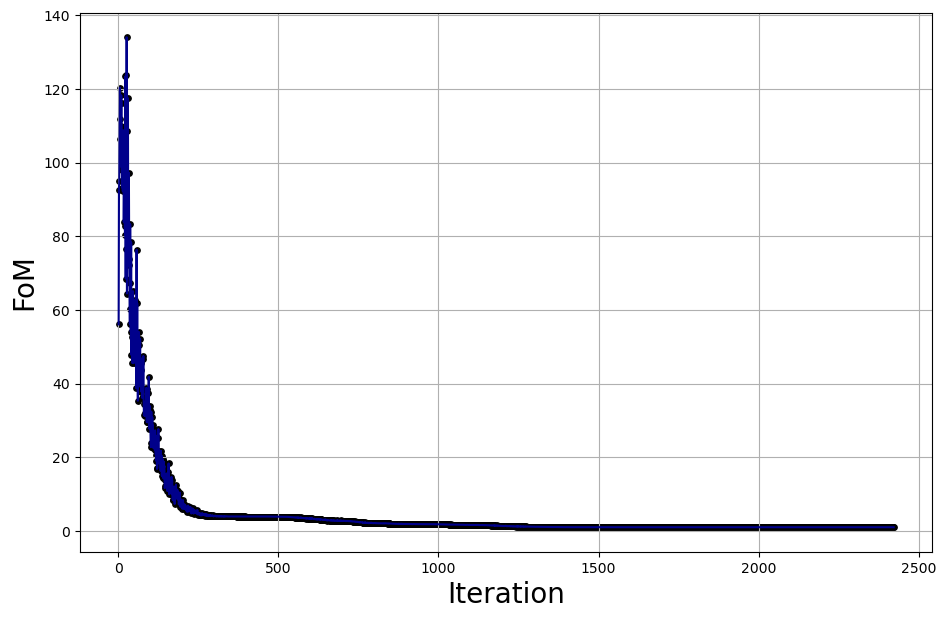

In [12]:
opt_alg_obj = optimization_obj.get_optimization_algorithm()

# FoM vs Iterations
fomlist = opt_alg_obj.FoM_list

# Plot the FoM over the function evaluations
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
num_eval = range(1, len(fomlist)+1)
ax.plot(num_eval, 1 + np.asarray(fomlist), color='darkblue', linewidth=1.5, zorder=10)
ax.scatter(num_eval, 1 + np.asarray(fomlist), color='k', s=15)
plt.grid(True, which="both")
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('FoM', fontsize=20)

In [13]:
# Write down the parameters
controls = opt_alg_obj.get_best_controls()
for index, parameter_value in enumerate(controls["parameters"]):
    print("Parameter Name: {0}, Value: {1}".format(parameters[index]["parameter_name"], parameter_value))

Parameter Name: Parameter0, Value: 0.9999997763923927
Parameter Name: Parameter1, Value: 1.0000000677484198
Parameter Name: Parameter2, Value: 0.9999998986101469
Parameter Name: Parameter3, Value: 0.9999997083501617
Parameter Name: Parameter4, Value: 0.9999998656852542
Parameter Name: Parameter5, Value: 0.9999996558537453
Parameter Name: Parameter6, Value: 0.9999991102868815
Parameter Name: Parameter7, Value: 0.9999982351858951
Parameter Name: Parameter8, Value: 0.9999963098091268
Parameter Name: Parameter9, Value: 0.9999919329952932


Finally, let's look at the used version of QuOCS

In [14]:
import quocslib
quocslib.__VERSION__

'0.0.55'